In [17]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


In [18]:
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


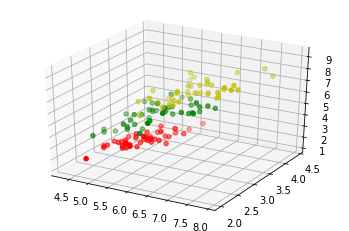

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [20]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


In [21]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [22]:
for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)

0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.2645751311064586, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]


In [23]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [24]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


In [25]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [26]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]
